<h2> Click Ads Probability Prediction </h2>


<p> In this notebook, we would like to predict the probability of view to click Ads based on Machine learning algorithms. </p>
<p> We will first carry out an exploratory data analysi of our dataset, to determine how each features can impact the decision to click or not on an Ads.</p> <p> After that, we will select the features to be used and  look at a bunch of Classifier to see how well they perform on our problem.</p>
<p> Without further ado, let's dive deep into it.</p>

<h3> Importing the necessary libraries</h3>

In [1]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p> Let's load our dataset.</p>

In [3]:
 #/test3_data.csv
 #df=pd.read_csv("/content/drive/MyDrive/Datasets/test3_data.csv")
 df=pd.read_csv("/test3_data.csv")


# Display the imported data
df.head()

,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime
0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601
1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945
2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106
3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647
4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148


<p> As we can see, the data contains both categorical, numerical and string data which we will need to clean for our predictive analysis.</p>



In [ ]:
#let's look at some general characteristics
#of our dataset

print(df.info(verbose=True))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1000000 non-null  int64  
 1   ID               1000000 non-null  object 
 2   ActionTime       1000000 non-null  int64  
 3   Action           1000000 non-null  object 
 4   Website          1000000 non-null  object 
 5   BannerSize       1000000 non-null  object 
 6   Brand            1000000 non-null  object 
 7   colour           1000000 non-null  object 
 8   InteractionTime  999992 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 68.7+ MB
None
(1000000, 9)


<p> We have a dataset of 9 attributes with 1000000 entries. Let's look at further features of our dataset. </p>

<h2>EDA: Exploratory Data Analysis</h2>

<h4>Action feature</h4>

<Axes: xlabel='Action', ylabel='count'>

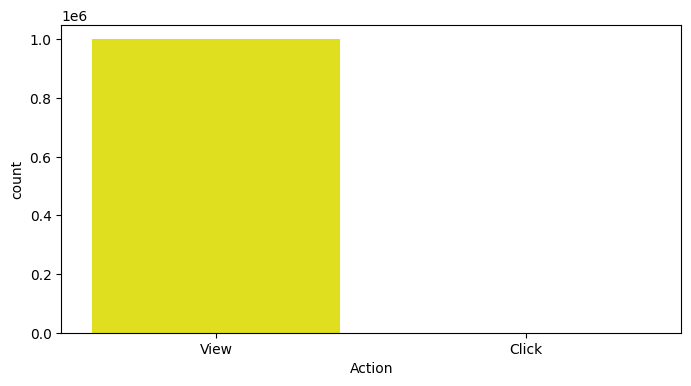

In [ ]:
#let's look at our target variable Action.
fig=plt.figure(figsize=(8,4))
sns.countplot(x='Action', data=df,color='yellow')


<p> As we can see we have a very high number of <b> view Action</b> compared to <b>Click Action </b>. This already suggests:</p>
<p>
1.  that our dataset is highly imbalanced
and we will need to deal with that before training our model.</p>
<p>
2.This also shows that the majority of the users are only viewing the ads and not clicking on them. </p>
<p>
3. We also need to transform this features into a numerical one.
</p>




In [4]:
#let's transform the Action column to be a
# categorical data as this is our target column

#turn the action column into categorical data
#get list of values from the ation column

actions=df['Action'].unique()

print(actions)

# Apply the categorical value
df['Action'] = pd.Categorical(df['Action'], categories=actions)

#add the numerical data as a new column which will be removed
# later
df['Action_num']=df['Action'].astype('category').cat.codes
df.head()


['View' 'Click']


,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime,Action_num
0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601,0
1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945,0
2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106,0
3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647,0
4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148,0


Websites feature

<Axes: xlabel='Website', ylabel='count'>

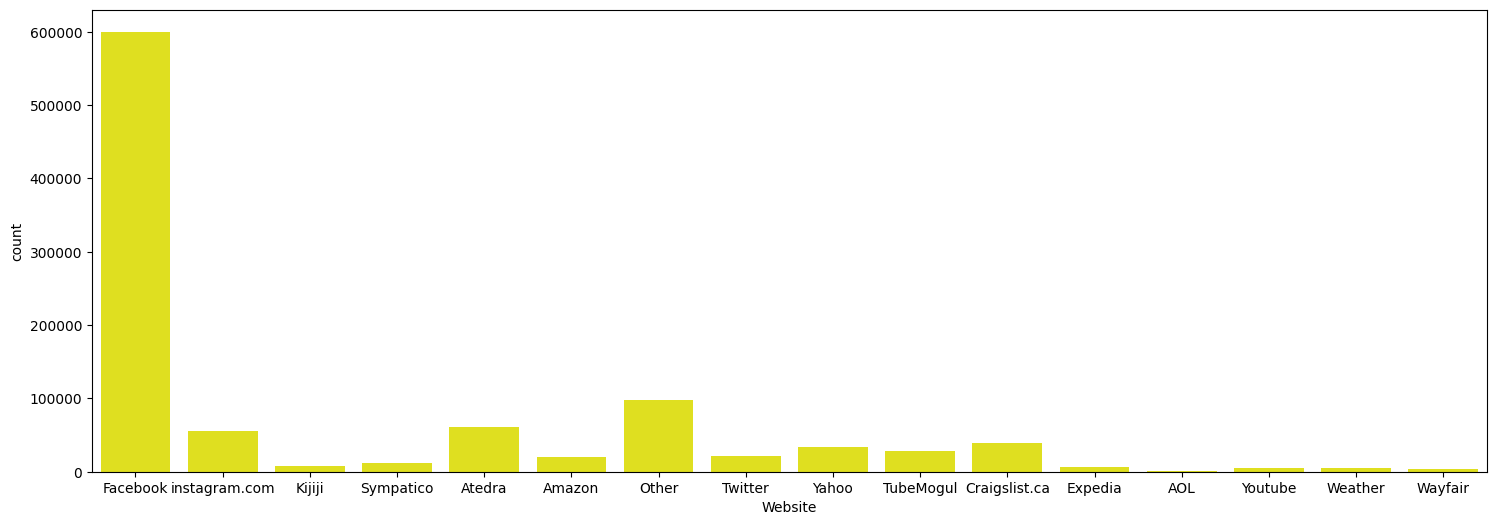

In [ ]:
#let's look at our  variable Website.
fig=plt.figure(figsize=(18,6))
sns.countplot(x='Website', data=df,color='yellow')

<p> the most view Ads are on <b>Facebook</b> which has almost <b>600 000</b> views.  </p>
<p>Let's also turn this feature into numerical data.</p>

In [5]:
#let's transform the Website column to be a
# categorical data as well.

#turn the action column into categorical data
#get list of values from the ation column

websites=df['Website'].unique()

print(websites)

# Apply the categorical value
df['Website'] = pd.Categorical(df['Website'], categories=websites)


#add the numerical data as a new column which will be removed
# later
df['Website_num']=df['Website'].astype('category').cat.codes
df.head()


['Facebook' 'instagram.com' 'Kijiji' 'Sympatico' 'Atedra' 'Amazon' 'Other'
 'Twitter' 'Yahoo' 'TubeMogul' 'Craigslist.ca' 'Expedia' 'AOL' 'Youtube'
 'Weather' 'Wayfair']


,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime,Action_num,Website_num
0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601,0,0
1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945,0,0
2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106,0,0
3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647,0,0
4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148,0,1


<h4> Banner feature</h4>

<Axes: xlabel='BannerSize', ylabel='count'>

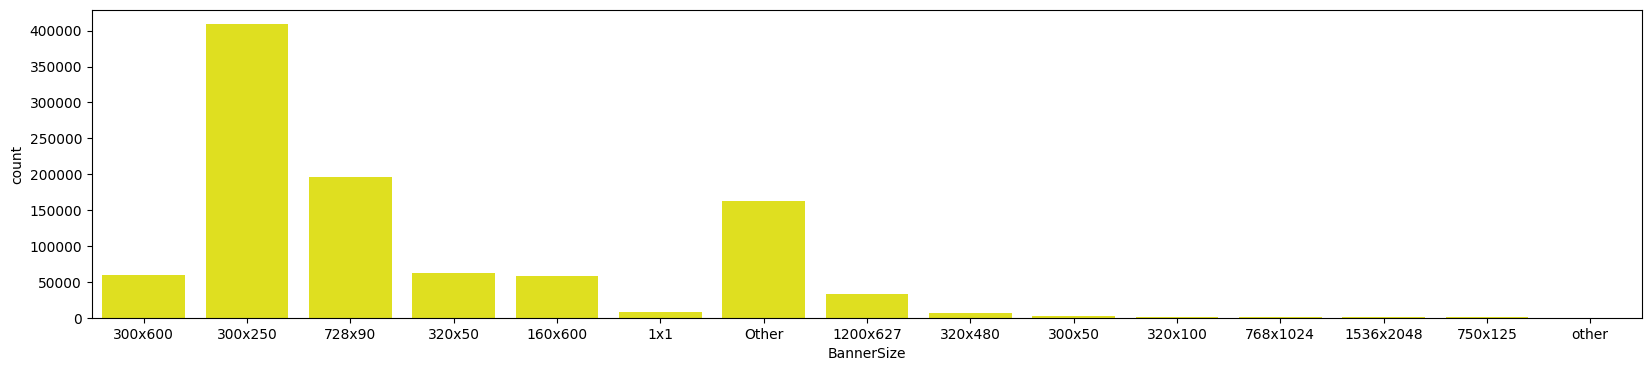

In [ ]:
#let's look at:  BannerSize.

fig=plt.figure(figsize=(20,4))
sns.countplot(x='BannerSize', data=df,color='yellow')

<p>This diagram suggests that the Ads of size <b>300x250</b> have the highest <b> number of views</b>. While the largest size ones are barely seen. This can indicate that the size of the brand has a high impact on whether the Ads is view or not.</p>

<p>As well we see that we have two values of <b>other</b> which we need to combine to only one value <b>other</b> and after that, turn this feature into numerical data as well. </p>

In [6]:
#let's correct the 'Other' value of the 'BannerSize' column
#to 'other' only value.

df['BannerSize'].replace('Other', 'other', inplace=True)

#let's turn the values into numerical data
bannerSize=df['BannerSize'].unique()

print(bannerSize)

# Apply the categorical value
df['BannerSize'] = pd.Categorical(df['BannerSize'], categories=bannerSize)


#add the numerical data as a new column which will be removed
# later
df['BannerSize_num']=df['BannerSize'].astype('category').cat.codes
df.head()


['300x600' '300x250' '728x90' '320x50' '160x600' '1x1' 'other' '1200x627'
 '320x480' '300x50' '320x100' '768x1024' '1536x2048' '750x125']


,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime,Action_num,Website_num,BannerSize_num
0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601,0,0,0
1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945,0,0,1
2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106,0,0,2
3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647,0,0,3
4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148,0,1,1


<Axes: xlabel='BannerSize', ylabel='count'>

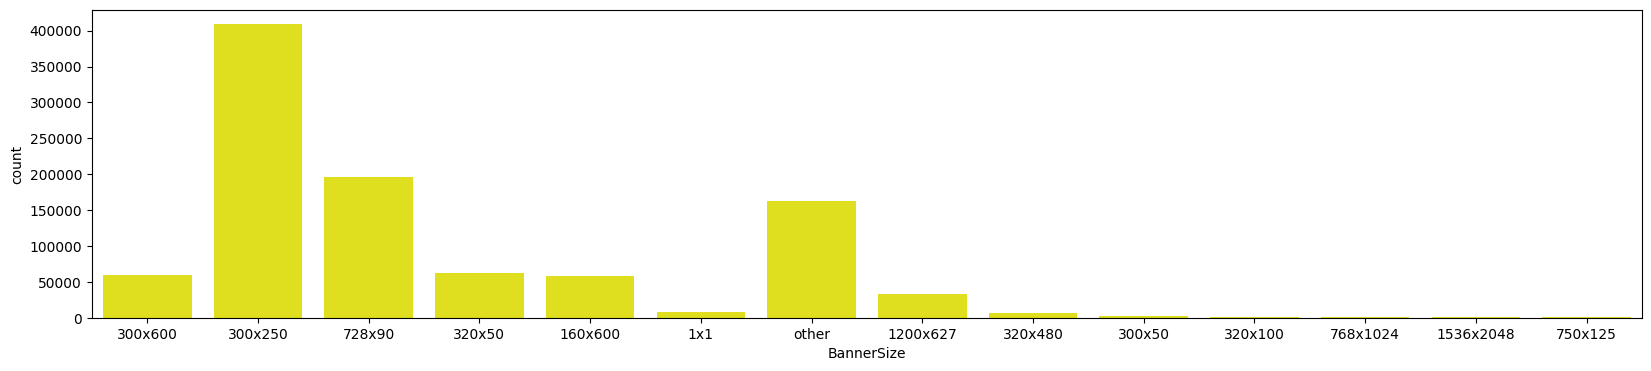

In [ ]:
#lets plot again our BannerSize Column with the correction made
fig=plt.figure(figsize=(20,4))
sns.countplot(x='BannerSize', data=df,color='yellow')


<p> As we can see,it has been corrected and we only have one <b>other</b> value for the <b> BannerSize</b> Column.</p>
<p> Let's look at the <b>Brand</b> feature.</p>

<h4> Brand feature</h4>

<Axes: xlabel='Brand', ylabel='count'>

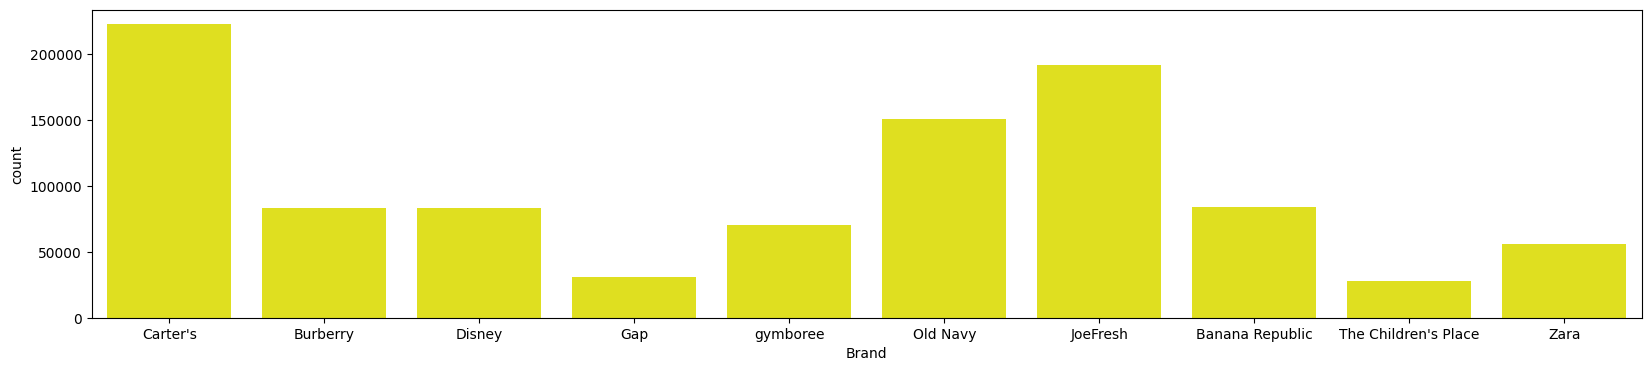

In [ ]:
fig=plt.figure(figsize=(20,4))
sns.countplot(x='Brand', data=df,color='yellow')

<p>Two main brands come out of the blue. <b> Carter's</b> and <b>Joe Fresh</b> which have the highest number of view.</p>

<p>As well let's also turn this into numerical data.</p>


In [7]:
#let's turn the values into numerical data
brand=df['Brand'].unique().tolist()

#brand=["Carter's" 'Burberry' 'Disney' 'Gap' 'gymboree' 'Old Navy' 'JoeFresh'
# 'Banana Republic' "The Children's Place" 'Zara']


print(brand)

# Apply the categorical value
df['Brand'] = pd.Categorical(df['Brand'], categories=brand)


#add the numerical data as a new column which will be removed
# later
df['Brand_num']=df['Brand'].astype('category').cat.codes

df.head()

["Carter's", 'Burberry', 'Disney', 'Gap', 'gymboree', 'Old Navy', 'JoeFresh', 'Banana Republic', "The Children's Place", 'Zara']


,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime,Action_num,Website_num,BannerSize_num,Brand_num
0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601,0,0,0,0
1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945,0,0,1,1
2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106,0,0,2,2
3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647,0,0,3,0
4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148,0,1,1,3


<h4>Color feature </h4>

<Axes: xlabel='colour', ylabel='count'>

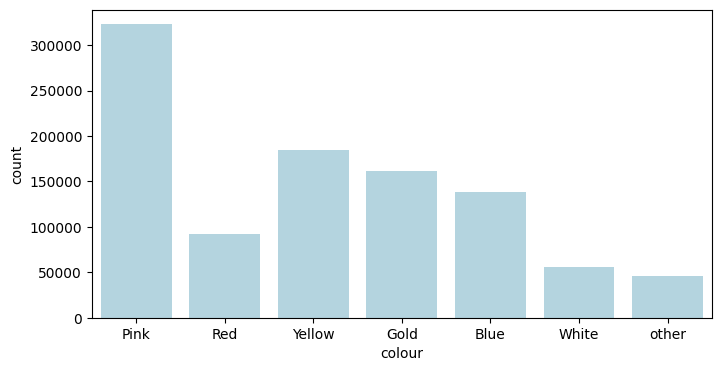

In [ ]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x='colour', data=df,color='lightblue')

<p>The <b>Pink</b> colour appears to be the best performing colours so far and provides the highest number of views.</p>
<p>Let's also turn this into numerical data</p>


In [8]:
#let's turn the values into numerical data
colour=df['colour'].unique().tolist()

colour=['Pink', 'Red', 'Yellow', 'Gold', 'Blue', 'White', 'other']

print(colour)

# Apply the categorical value
df['colour'] = pd.Categorical(df['colour'], categories=colour)


#add the numerical data as a new column which will be removed
# later
df['colour_num']=df['colour'].astype('category').cat.codes

df.head()

['Pink', 'Red', 'Yellow', 'Gold', 'Blue', 'White', 'other']


,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime,Action_num,Website_num,BannerSize_num,Brand_num,colour_num
0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601,0,0,0,0,0
1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945,0,0,1,1,1
2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106,0,0,2,2,2
3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647,0,0,3,0,2
4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148,0,1,1,3,3


<h3> Numerical feature</h3>
<p> Let's break our <b>ActionTime</b> feature into its various components.</p>

In [9]:
#let's break the actionTime columns
#data Cleaning
#first, let's convert the columns data type into timestamp dtype
df['ActionTime']=df['ActionTime'].apply(pd.Timestamp,unit='us')

df['Year'] = df['ActionTime'].dt.year
df['Month'] = df['ActionTime'].dt.month
df['Day'] = df['ActionTime'].dt.day
df['Hour'] = df['ActionTime'].dt.hour
df['Min'] = df['ActionTime'].dt.minute
df['Sec'] = df['ActionTime'].dt.second

#remove ActionTime column
df.drop('ActionTime', axis=1, inplace=True)

#remove as well the Unname column
df.drop('Unnamed: 0', axis=1, inplace=True)







In [9]:
#Let's look at stats of the non-object features
print(df.describe())

       InteractionTime      Action_num     Website_num  BannerSize_num  \
count    999992.000000  1000000.000000  1000000.000000  1000000.000000   
mean          0.998667        0.000244        2.394213        2.575098   
std           0.998170        0.015619        3.555916        2.174032   
min           0.000002        0.000000        0.000000        0.000000   
25%           0.288696        0.000000        0.000000        1.000000   
50%           0.693044        0.000000        0.000000        2.000000   
75%           1.382822        0.000000        5.000000        4.000000   
max          13.385281        1.000000       15.000000       13.000000   

            Brand_num      colour_num            Year           Month  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean         3.838527        2.049383     2017.131083        8.481910   
std          2.856833        1.824619        0.337491        3.146331   
min          0.000000        0.000000    

<p> We can see the following based on the <b> Interaction Time stat</b> that:
<ul><li> the average interactionTime is .99 sec which is likely close to <b>1 sec</b> which shows that the most majority of these interactions are only <b> "viewed interaction (75%)"</b> (<i>from <b>Action_num</b> column)</i>. </li> <li> This also indicates that users spent very less time on each Ads; which can be something as well to investigate in order to determine what causes this behavior.</li></ul></p>





<h4>Checking for missing values</h4>

In [10]:
#check for missing data
missing_values=df.isnull().sum()
print(missing_values)

ID                 0
Action             0
Website            0
BannerSize         0
Brand              0
colour             0
InteractionTime    8
Action_num         0
Website_num        0
BannerSize_num     0
Brand_num          0
colour_num         0
Year               0
Month              0
Day                0
Hour               0
Min                0
Sec                0
dtype: int64


We have only 8 missing values in the InteractionTime column, we will replace these missing values with zero.

In [11]:
#filling the missing value with zero
#print(missing_values)
df['InteractionTime'].fillna(0, inplace=True)

From the histogram of Action, we can see that we have a very large number of ads viewed compared to clicked. This makes our dataset to be imbalanced. This we need to address as well.

<h2> Feature Selection/Extraction </h2>

<p> Let's look at the correlation matrix.</p>

In [12]:
#use to select numerical features
features_filter = ['Year', 'Month','Day','Hour','Min','Sec', 'InteractionTime', 'BannerSize_num',
                  'Brand_num', 'colour_num', 'Website_num','Action_num']


<Axes: >

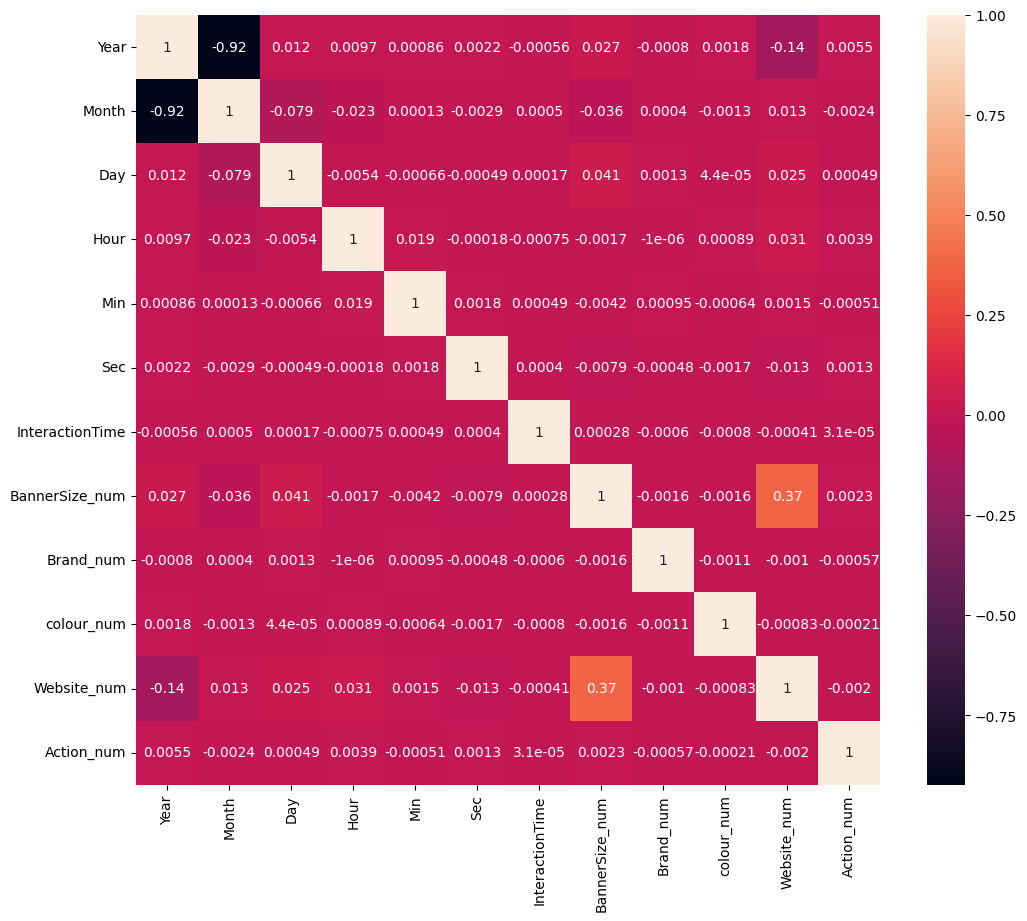

In [13]:

# Create a sample dataframe
data = df[features_filter]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# display the correlation matrix
fig=plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True)


<p> From the correlatiom matrix above, we see that there is a weak correlation betwenn our target variable and our numerical features.</p>

<h2> Data Preparation </h2>
<p> Let's split our data in train and test set to train our models.</p>

In [14]:


#extract data to be used...
df_numeric = df[features_filter ]


train_features = ['Year', 'Month','Day','Hour','Min','Sec', 'InteractionTime', 'BannerSize_num',
                  'Brand_num', 'colour_num', 'Website_num']



scaler = StandardScaler()

#scale our data
df_numeric[train_features ] = scaler.fit_transform(df_numeric[train_features ])

X = df_numeric[train_features ]
y = df_numeric['Action_num']

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=101)

print(x_train.shape, y_train.shape,type(x_train))
print(x_test.shape, y_test.shape)

#let's check the number of class samples per set
print(y_train.value_counts())
print(y_test.value_counts())


(750000, 11) (750000,) <class 'pandas.core.frame.DataFrame'>
(250000, 11) (250000,)
Action_num
0    749819
1       181
Name: count, dtype: int64
Action_num
0    249937
1        63
Name: count, dtype: int64


<p> Let's as well compute the Principal Components (PCs) for our train set and see how they correlate with our target variable.</p>

<Axes: >

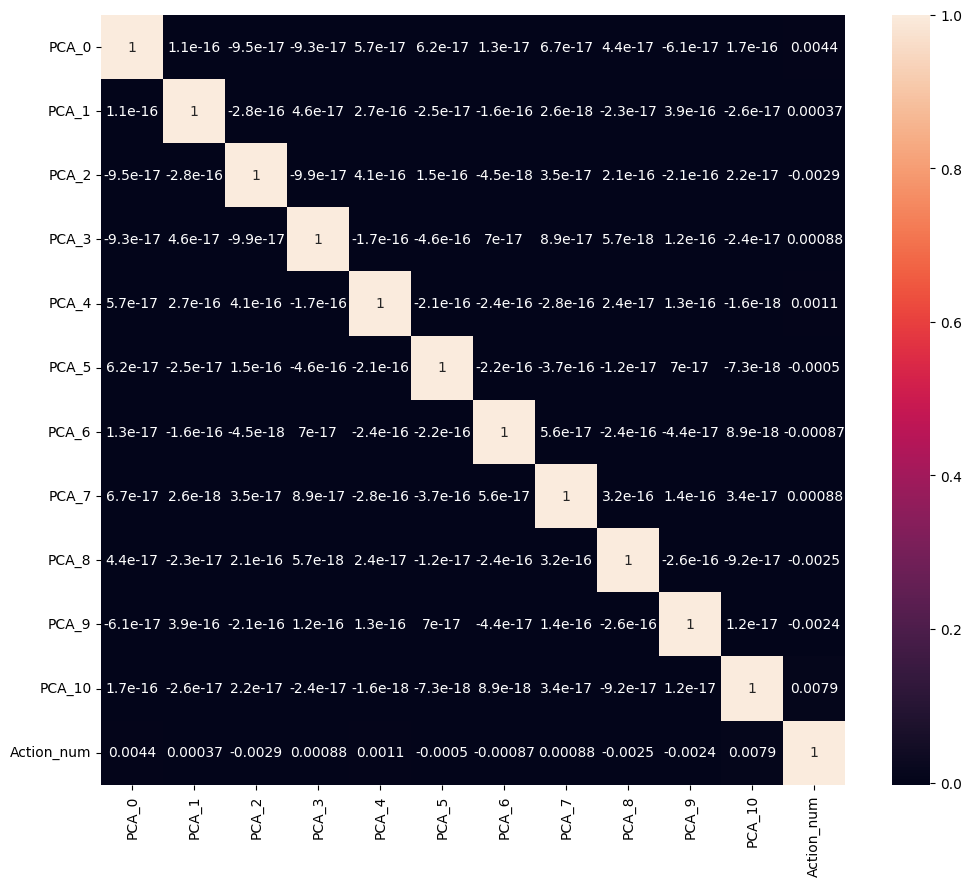

In [15]:
from sklearn.decomposition import PCA

# create instance of PCA
pca = PCA()



data_pca=x_train

#apply pca
X_train_ = pca.fit_transform(data_pca)

df_2=pd.DataFrame()

#add the PCA components to our data
for el in range(11):
  df_2['PCA_'+str(el)]=X_train_[:,el]


df_2['Action_num']=y_train.values


#compute the correlation matrix
correlation_matrix=df_2.corr()


#display correlation matrix
fig=plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True)



<p> From the correlation matrix above, we will combine all the features selected in our dataset for our Prediction Task. As we can see, there is also a weak correlation between the PCA components and our target variable.</p>
<p> Since our data have been splitted, we can now start the training phase with different classifiers to see how well they perform on our data.</p>
<p> Let's begin.</p>

<h4> LogisticRegression Classifier</h4>

<h5>Training</h5>

In [ ]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(x_train, y_train)



<h5> Evaluate Metrics</h5>

In [ ]:
predictions_LR = LR.predict(x_test)


In [15]:
#use to plot the confusion matrix
def plot_cm(cm):
  group_names = ['TN','FP','FN','TP']
  group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    249937
           1       0.00      0.00      0.00        63

    accuracy                           1.00    250000
   macro avg       0.50      0.50      0.50    250000
weighted avg       1.00      1.00      1.00    250000



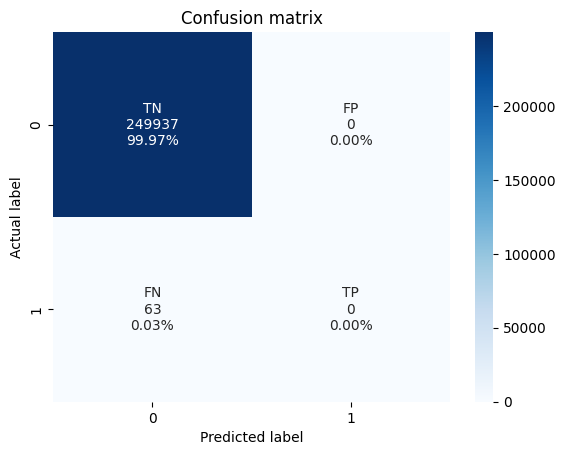

In [ ]:
cf_matrix = confusion_matrix(y_test,predictions_LR )


print(classification_report(y_test, predictions_LR))

plot_cm(cf_matrix )

<h4> Decision Tree Classifier</h4>

<h4> Training</h4>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)



DecisionTreeClassifier()



<h4> Evaluate Metrics</h4>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    249937
           1       0.00      0.00      0.00        63

    accuracy                           1.00    250000
   macro avg       0.50      0.50      0.50    250000
weighted avg       1.00      1.00      1.00    250000



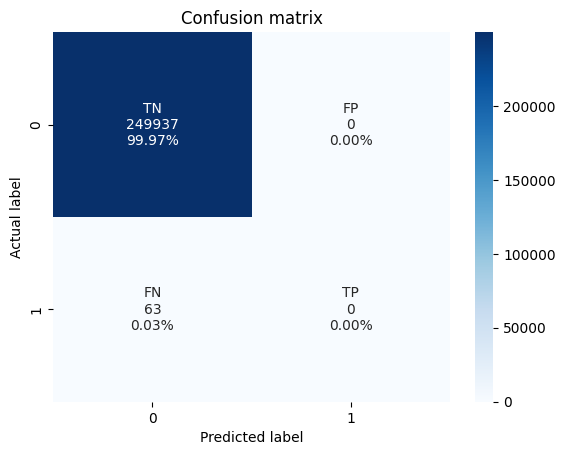

In [ ]:
predictions_DT = model2.predict(x_test)

predictions_LR = LR.predict(x_test)

#compute confusion matrix
cf_matrix = confusion_matrix(y_test,predictions_LR )

#print classification report and confusion matrix
print(classification_report(y_test, predictions_LR))

plot_cm(cf_matrix )

<p> Because we do not have enough samples of the minority class, both previous classifiers are not able to recognize any samples of the minority.
To tackle this, we are going to oversample our data with <b> SMOTE</b> and used the oversamples training dataset with an ensemble of classifiers.

In [16]:
# Oversample the dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
x_train_over_s, y_train_over_s = oversample.fit_resample(x_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)
counter = Counter(y_train_over_s)
print(counter)



Counter({0: 749819, 1: 181})
Counter({0: 749819, 1: 749819})


<h4> Gradient Boost Classifier</h4>

<h4> Training</h4>

In [ ]:
from xgboost import XGBClassifier

model3 = XGBClassifier()
model3.fit(x_train, y_train)





<h4> Evaluate Metrics</h4>

In [47]:
predictions = model3.predict(x_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    249937
           1       0.00      0.00      0.00        63

    accuracy                           1.00    250000
   macro avg       0.50      0.50      0.50    250000
weighted avg       1.00      1.00      1.00    250000



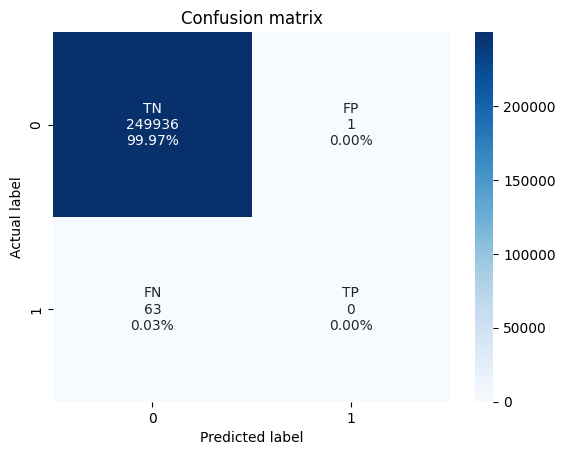

In [48]:
cf_matrix = confusion_matrix(y_test,predictions )


print(classification_report(y_test, predictions))

plot_cm(cf_matrix )



<h4> Random Forest Classifier</h4>

In [22]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 25
max_features = 12
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)


<h4> Training</h4>

In [ ]:
model.fit(x_train, y_train)


RandomForestClassifier(max_features=12, n_estimators=25)

<h4>Evaluate Metrics</h4>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    249937
           1       0.00      0.00      0.00        63

    accuracy                           1.00    250000
   macro avg       0.50      0.50      0.50    250000
weighted avg       1.00      1.00      1.00    250000



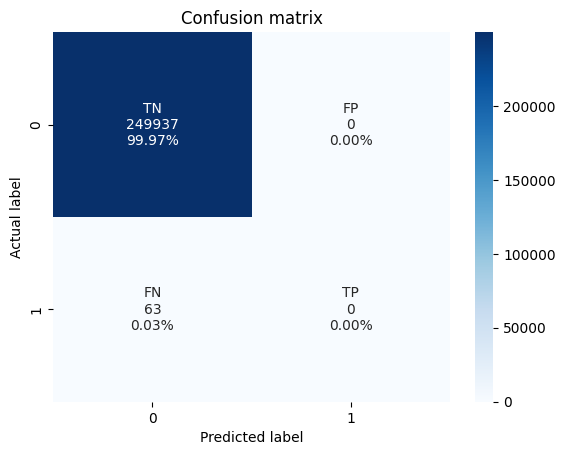

In [ ]:
predictions = model.predict(x_test)

cf_matrix = confusion_matrix(y_test,predictions )


print(classification_report(y_test, predictions))

plot_cm(cf_matrix )

<h4> AdaBoostClassifier</h4>

<h4> Training</h4>

In [23]:
# AdaBoost Classification

from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 25


kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit( x_train, y_train)


AdaBoostClassifier(n_estimators=25, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    249937
           1       1.00      0.02      0.03        63

    accuracy                           1.00    250000
   macro avg       1.00      0.51      0.52    250000
weighted avg       1.00      1.00      1.00    250000



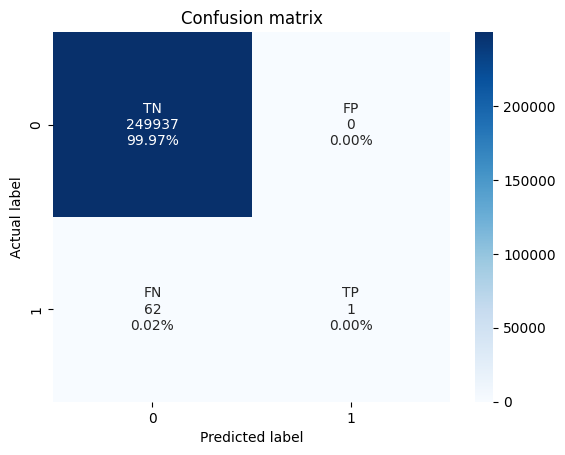

In [24]:
predictions = model.predict(x_test)


cf_matrix = confusion_matrix(y_test,predictions )


print(classification_report(y_test, predictions))

plot_cm(cf_matrix )

<p>The AdaBoost Classifier was able to detect one sample of the minority class as compare to the previous classifiers when trained on the dataset without oversampling.</p>
<p> Let's train the same classifier on the oversample dataset to see how it performs.</p>

In [25]:
# AdaBoost Classification
#import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_estimators = 25


model = AdaBoostClassifier(n_estimators=num_estimators, random_state=seed)

#train the model
model.fit( x_train_over_s, y_train_over_s)


AdaBoostClassifier(n_estimators=25, random_state=7)

<h4> Evaluate Metrics </h4>

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    249937
           1       0.00      0.22      0.00        63

    accuracy                           0.85    250000
   macro avg       0.50      0.53      0.46    250000
weighted avg       1.00      0.85      0.92    250000



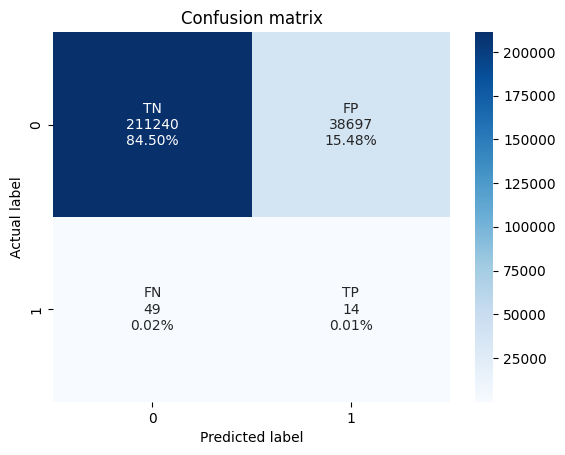

In [26]:
predictions = model.predict(x_test)


cf_matrix = confusion_matrix(y_test,predictions )


print(classification_report(y_test, predictions))

plot_cm(cf_matrix )

<p> We can see a huge increase in the results (from 1 sample to 14 samples) when using the oversample dataset. We also see that there is a slight decrease in performance of the negative class.</p>

<p> Let's try pushing these performance even further by training an ensemble of AdaBoost Classifiers with K-Fold validation.<p>

In [27]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

seed=7
num_estimators=25
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_estimators, random_state=seed)

#train the ensemble
res = model_selection.cross_validate(model, x_train_over_s, y_train_over_s, scoring='roc_auc', cv=kfold,return_estimator=True,return_train_score=True)
print(res.keys())


dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])


In [28]:
print('train_score: {:.2f} '.format(res['train_score'].mean()))
print('test_score: {:.2f} '.format(res['test_score'].mean()))
print('number of estimators used:',len(res['estimator']))

train_score: 0.93 
test_score: 0.93 
number of estimators used: 10


<h4> Evaluate Metrics</h4>
<p> For evaluation, we are going to make predictions using all the estimators (in this case, 10) and select the max probability to have the probability of each sample.</p>

In [32]:
#let's make predictions
y_pred=[]
for i in range(len(res['estimator'])):
  y_pred_=res['estimator'][i].predict(x_test)
  y_pred.append(y_pred_)



In [33]:
#let's transpose and take the max probability for each sample
y_pred=np.array(y_pred).transpose().max(axis=1)
print(y_pred.shape)

(250000,)


              precision    recall  f1-score   support

           0       1.00      0.84      0.91    249937
           1       0.00      0.22      0.00        63

    accuracy                           0.84    250000
   macro avg       0.50      0.53      0.46    250000
weighted avg       1.00      0.84      0.91    250000



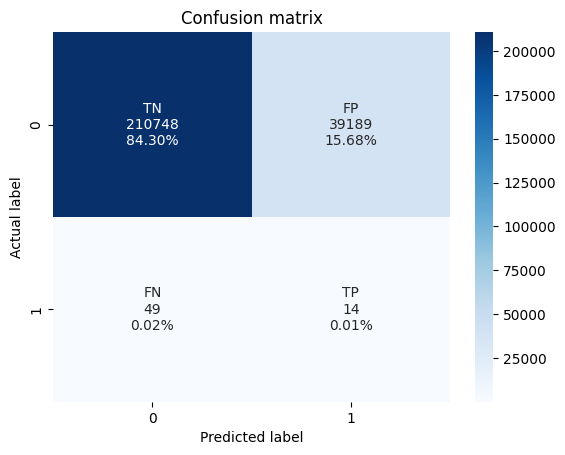

In [35]:
#compute confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)

#print classification report and confusion matrix
print(classification_report(y_test, y_pred))

plot_cm(cf_matrix )

<p> We notice a slight decrease in results.</p> <p> let's use the stratified k-fold validation.</p>

In [19]:

from numpy import mean
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import AdaBoostClassifier


seed=7
num_estimators=25

# define model
model = AdaBoostClassifier(n_estimators=num_estimators, random_state=seed)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)

#train the ensemble
res = model_selection.cross_validate(model, x_train_over_s, y_train_over_s, scoring='roc_auc', cv=cv,return_estimator=True,return_train_score=True)

print(res.keys())

dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])


In [20]:
print('train_score: {:.2f} '.format(res['train_score'].mean()))
print('test_score: {:.2f} '.format(res['test_score'].mean()))
print('number of estimators used:',len(res['estimator']))

train_score: 0.92 
test_score: 0.92 
number of estimators used: 30


<h4> Evaluate Metrics</h4>


In [21]:
#let's make predictions
y_pred=[]
for i in range(len(res['estimator'])):
  y_pred_=res['estimator'][i].predict(x_test)
  y_pred.append(y_pred_)



In [22]:
#let's transpose and take the max probability for each sample
y_pred=np.array(y_pred).transpose().max(axis=1)
print(y_pred.shape)

(250000,)


              precision    recall  f1-score   support

           0       1.00      0.76      0.87    249937
           1       0.00      0.33      0.00        63

    accuracy                           0.76    250000
   macro avg       0.50      0.55      0.43    250000
weighted avg       1.00      0.76      0.87    250000



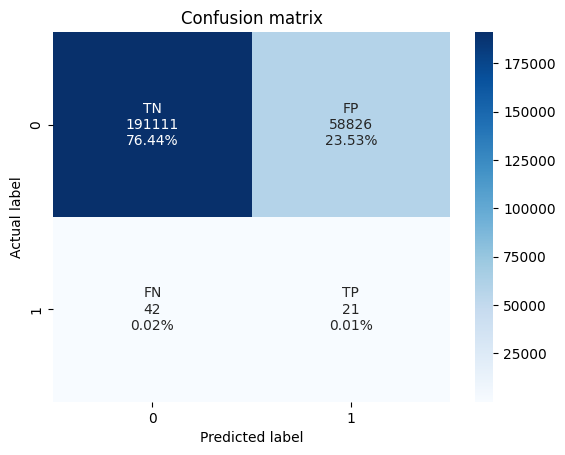

In [23]:
#compute confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)

#print classification report and confusion matrix
print(classification_report(y_test, y_pred))

plot_cm(cf_matrix )

<p> Now let's train our ensemble model by random under sampling and oversampling with stratified k-fold validation.</p>

In [41]:
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

seed=7
num_estimators=25

# define pipeline
model = AdaBoostClassifier(n_estimators=num_estimators, random_state=seed)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)

#train the ensemble
res = model_selection.cross_validate(pipeline, x_train, y_train, scoring='roc_auc', cv=cv,return_estimator=True,return_train_score=True)

print(res.keys())

dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])


In [42]:
print('train_score: {:.2f} '.format(res['train_score'].mean()))
print('test_score: {:.2f} '.format(res['test_score'].mean()))
print('number of estimators used:',len(res['estimator']))

train_score: 0.67 
test_score: 0.59 
number of estimators used: 30


<h4> Evaluate Metrics</h4>


In [43]:
#let's make predictions
y_pred=[]
for i in range(len(res['estimator'])):
  y_pred_=res['estimator'][i].predict(x_test)
  y_pred.append(y_pred_)



In [44]:
#let's transpose and take the max probability for each sample
y_pred=np.array(y_pred).transpose().max(axis=1)
print(y_pred.shape)

(250000,)


              precision    recall  f1-score   support

           0       1.00      0.78      0.87    249937
           1       0.00      0.41      0.00        63

    accuracy                           0.78    250000
   macro avg       0.50      0.59      0.44    250000
weighted avg       1.00      0.78      0.87    250000



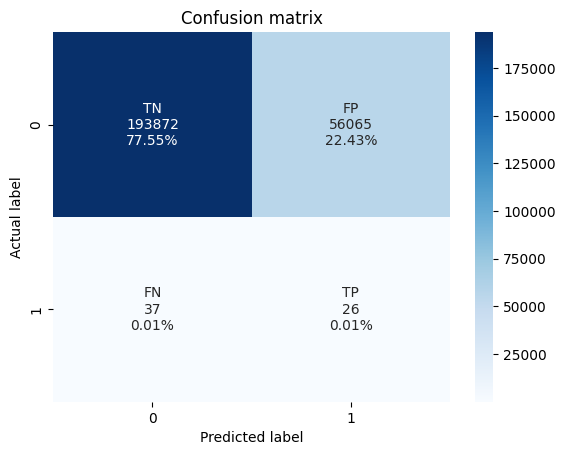

In [45]:
#compute confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)

#print classification report and confusion matrix
print(classification_report(y_test, y_pred))

plot_cm(cf_matrix )

<p> We see an increase in results by combining oversampling and undersampling. But there's also a decrease in performance in the majority class.Thus finding the appropriate trade-off is really necessary.</p>

<h3> Key Takeways </h3>
<p> As we can see, dealing with imbalanced datasets can be complex. This complexity is usually due to the fact that there is not enough training samples for the minority class.</p>
<p> As shown above, balancing the dataset by oversampling the minority class can yield an increase in the result. As well by random oversampling and undersampling.</p>

<p> Of course, much still need to be done to find the appropriate model that can be used to handle such task more effectively. </p>

<p> From the classification report above, one can see that a good model is the one which provide a good trade off between the <b> recall values</b> of both classes <i>(latest classification report and confusion table above)</i>.</p>